In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
from typing import Callable, Tuple
from numpy import sign
from math import sqrt


def root_search(
    f: Callable[[float], float], 
    a: float, b: float, dx: float
) -> Tuple[float, float]:
    x1 = a
    f1 = f(x1)

    x2 = x1 + dx
    f2 = f(x2)

    while sign(f1) == sign(f2):
        if x1 >= b:
            return None, None
        
        x1 = x2
        f1 = f2

        x2 = x1 + dx
        f2 = f(x2)
    else:
        return x1, x2
    
    
def bisection(
    f: Callable[[float], float],
    a: float, b: float, tol: float
) -> float:
    if abs(f(a)) <= tol:
        return a
    
    if abs(f(b)) <= tol:
        return b
    
    x1 = a
    f1 = f(x1)

    x2 = b
    f2 = f(x2)
    
    

    if sign(f1) == sign(f2):
        print("here")
        return None
    
    
    while x2 - x1 > tol:
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3)

        if abs(f3) <= tol:
            return x3
        
        if sign(f2) != sign(f3):
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
            
    print("Here")

    return (x1 + x2) / 2.


def ridder(
    f: Callable[[float], float],
    a: float, b: float, 
    tol: float, max_iter: int
) -> Tuple[float, int]:
    if abs(f(a)) <= tol:
        return a, 0
    
    if abs(f(b)) <= tol:
        return b, 0
    
    x1 = a
    f1 = f(x1)

    x2 = b
    f2 = f(x2)    
    
    x = 1.
    dx = 2 * tol

    iter = 0

    while abs(dx) > tol * max(abs(x), 1.) and iter < max_iter:
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3)

        s = sqrt(f3**2 - f1*f2)

        if s == 0.:
            return None, iter

        dx = (x3 - x1) * f3 / s

        if f1 < f2:
            dx = -dx

        x = x3 + dx
        fx = f(x)

        if sign(f3) == sign(fx):
            if sign(f1) != sign(fx):
                x2 = x
                f2 = fx
            else:
                x1 = x
                f1 = fx
        else:
            x1 = x3
            f1 = f3

            x2 = x            
            f2 = fx

        iter += 1

    return x, iter
        
def newton_raphson(
    f: Callable[[float], float],
    df: Callable[[float], float],
    a: float, b: float, 
    tol: float, max_iter: int
) -> Tuple[float, int]:
    if abs(f(a)) <= tol:
        return a, 0
    
    if abs(f(b)) <= tol:
        return b, 0
    
    x1 = a
    f1 = f(x1)

    x2 = b
    f2 = f(x2)    

    if sign(f1) == sign(f2):
        return None, 0
    
    x = 0.5 * (x1 + x2)
    dx = 2 * tol * max(abs(x), 1.)

    iter = 0

    while abs(dx) > tol * max(abs(x), 1.) and iter < max_iter:
        fx = f(x)

        if abs(fx) <= tol:
            return x, iter
        
        if sign(f1) != sign(fx):
            x2 = x
        else:
            x1 = x

        dfx = df(x)

        if abs(dfx) <= tol:
            return None, iter
        
        dx = -fx / dfx
        x = x + dx

        if (x2 - x)*(x - x1) < 0.:
            dx = 0.5 * (x2 - x1)
            x = x1 + dx

        iter += 1

    return x, iter

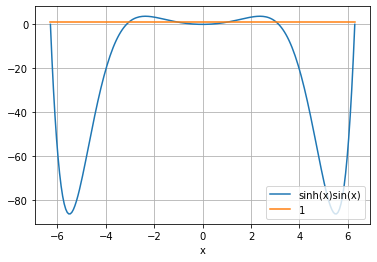

In [61]:
def f(x):
    return np.sinh(x) * np.sin(x) - 1

x = np.linspace(-2 * np.pi, 2 * np.pi, 200)

y = np.sinh(x) * np.sin(x)
z = y ** 0

plt.xlabel('x')
plt.grid(True)
plt.plot(x, y, label='sinh(x)sin(x)')
plt.plot(x, z, label='1')
plt.legend(loc='lower right')
plt.show()


In [62]:
left_b = -np.pi / 2
right_b = np.pi

x1, x2 = root_search(f, left_b, right_b, 0.000002)

x1, x2

(-1.0057283267786477, -1.0057263267786476)

In [63]:
x = bisection(f, left_b, right_b, 10**-9)
print(f"Методом бисекции {x}")
print(f"Погрешность {abs(f(x))}")

Методом бисекции -1.0057281766840283
Погрешность 3.0777758119882037e-10


In [64]:
x, iter = ridder(f, left_b, right_b, 10**-9, 100)

print(f"Методом Риддера {x}")
print(f"Количество итерации {iter}")
print(f"Погрешность {abs(f(x))}")

Методом Риддера -1.0057281765256207
Количество итерации 23
Погрешность 4.440892098500626e-16


In [67]:
def df(x):
    return np.cos(x) * np.sinh(x) + np.sin(x) * np.cosh(x)
    
    
x, iter = newton_raphson(f, df, left_b, right_b, 10**-9, 100)

print(f"Методом Ньютона-Рафсона {x}")
print(f"Количество итерации {iter}")
print(f"Погрешность {abs(f(x))}")

Методом Ньютона-Рафсона -1.0057281765256414
Количество итерации 6
Погрешность 3.952393967665557e-14
